# Análise de Dados de Estacionamento – Agosto/2025
 **Observação sobre os dados**

Os dados utilizados neste projeto são confidenciais e não estão disponibilizados neste repositório. O notebook demonstra a estrutura de análise, tratamento de dados e geração de insights aplicados a um dataset real.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## 1. Carregamento dos Dados

O dataset foi extraído de um sistema de controle de estacionamento. O caminho abaixo é ilustrativo e foi feito um sintetico para demonstração.

In [20]:
# Dataset confidencial (não incluído no repositório)
try:
    df = pd.read_csv(
        "estacionamento_agosto2025.csv",
        parse_dates=["entry_time", "exit_time"]
    )
except FileNotFoundError:
    print("Dataset confidencial não incluído no repositório.")
    print("Carregando dataset sintético apenas para demonstração.")

    df = pd.DataFrame({
        "ticket_id": range(1, 101),
        "entry_time": pd.date_range("2025-08-01 08:00", periods=100, freq="h"),
        "exit_time": pd.date_range("2025-08-01 09:00", periods=100, freq="h"),
        "tipo_cliente": ["Avulso", "Convênio"] * 50,
        "preco_pago": [10, 15, 12, 18] * 25,
        "duracao_horas": [1, 2, 1, 3] * 25
    })

Dataset confidencial não incluído no repositório.
Carregando dataset sintético apenas para demonstração.


## 2. Criação de Colunas Auxiliares

In [21]:
dias_pt = {
    0: 'Segunda', 1: 'Terça', 2: 'Quarta',
    3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'
}

df['dia_semana'] = df['entry_time'].dt.weekday.map(dias_pt)
df['dia'] = df['entry_time'].dt.date
df['hora'] = df['entry_time'].dt.hour

## 3. Métricas Gerais

In [22]:
total_tickets = len(df)
ticket_medio = df['preco_pago'].mean()

print(f'Total de tickets: {total_tickets}')
print(f'Ticket médio (valor interno): {round(ticket_medio, 2)}')

Total de tickets: 100
Ticket médio (valor interno): 13.75


## 4. Volume de Clientes por Tipo

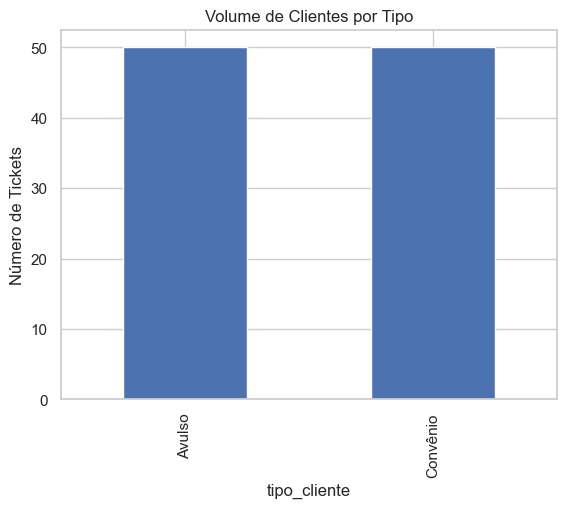

In [23]:
df['tipo_cliente'].value_counts().plot(kind='bar')
plt.title('Volume de Clientes por Tipo')
plt.ylabel('Número de Tickets')
plt.show()

## 5. Receita por Tipo de Cliente (Percentual)

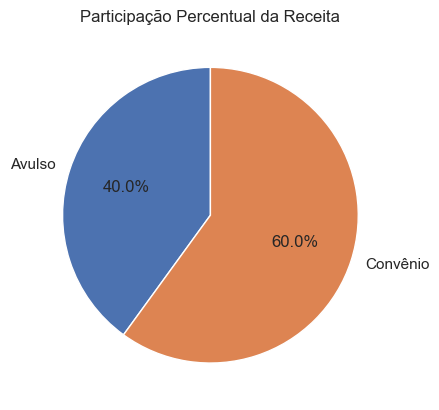

In [24]:
receita_tipo = df.groupby('tipo_cliente')['preco_pago'].sum()
receita_pct = receita_tipo / receita_tipo.sum() * 100

receita_pct.plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Participação Percentual da Receita')
plt.ylabel('')
plt.show()

## 6. Distribuição do Tempo de Permanência

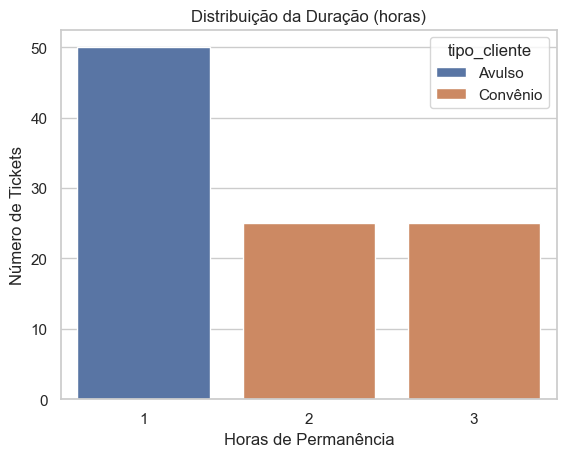

In [25]:
sns.countplot(x='duracao_horas', hue='tipo_cliente', data=df)
plt.title('Distribuição da Duração (horas)')
plt.xlabel('Horas de Permanência')
plt.ylabel('Número de Tickets')
plt.show()

## 7. Análise de Ocupação por Hora e Dia da Semana

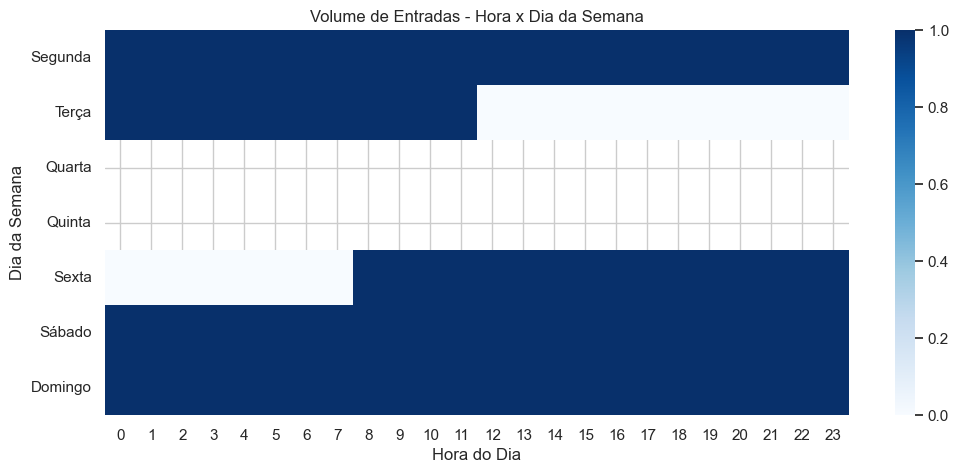

In [26]:
pivot = df.pivot_table(
    index='dia_semana', columns='hora', values='ticket_id', aggfunc='count'
).fillna(0)

ordem_dias = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']
pivot = pivot.reindex(ordem_dias)

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='Blues', annot=False)
plt.title('Volume de Entradas - Hora x Dia da Semana')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.show()